In [38]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

from implementations import *
from utilitaries import *
from additional_functions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Data Cleaning
===

In [15]:
from proj1_helpers import *

labels, tx, indices = load_csv_data('train.csv', sub_sample=False)
# b(background) -> -1 and s(signal) -> 1

clean_tx = remove_meaningless_data(tx, 0.3)
n_samples, n_features = np.shape(clean_tx)
print(n_samples, n_features)

standardize_tx = standardize(clean_tx)
# reshape tx to add offset, ones... c_

Removed features : [4, 5, 6, 12, 23, 24, 25, 26, 27, 28]
250000 20


Features selection
===

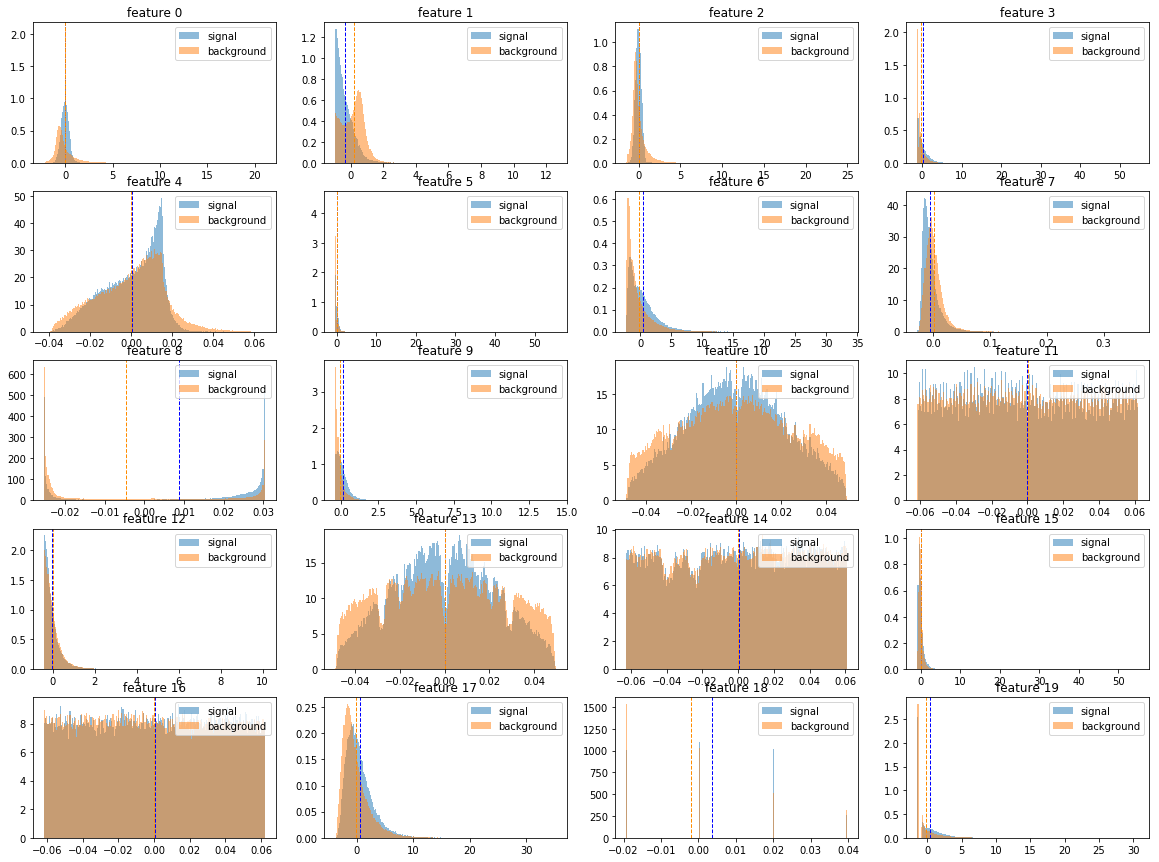

In [17]:
s_data = standardize_tx[labels == 1,:]
bg_data = standardize_tx[labels == -1,:]

plt.figure(figsize=(20,15))

pics = 200

for i in range(n_features):
    plt.subplot(5,4,i+1)
    plt.hist(s_data[:,i][~np.isnan(s_data[:,i])], pics, density=1, alpha=0.5, label='signal')
    plt.hist(bg_data[:,i][~np.isnan(bg_data[:,i])], pics, density=1, alpha=0.5, label='background')
    plt.axvline(s_data[:,i][~np.isnan(s_data[:,i])].mean(), color='b', linestyle='dashed', linewidth=1)
    plt.axvline(bg_data[:,i][~np.isnan(bg_data[:,i])].mean(), color='darkorange', linestyle='dashed', linewidth=1)
    plt.legend(loc='upper right')
    plt.title(f'feature {i}') 

In [23]:
# Does it make sens now that the data is standardized??????

# Mean discrimination
for i in range(n_features):
    threshold_mean = 0.05
    diff_mean = (np.abs(np.abs((s_data[:,i]).mean()) - np.abs((bg_data[:,i]).mean())))/np.abs((standardize_tx[:,i]).mean())
    if diff_mean < threshold_mean:
        print('Diff mean',i,s_data[:,i].mean(),bg_data[:,i].mean(),diff_mean)
    # useless features : 2,4,5,12,15

#low variance filter : data columns with too little changes carry little info
threshold_var = 0.001
variances = np.var(standardize_tx, axis = 0) / np.linalg.norm(standardize_tx, axis = 0)
for i in range(n_features):
    if variances[i] < threshold_var:
        print('Low variance :',i,variances[i])
#useless features: 4,7

#high correlation filter : data columns with similar trends carry similar info
correlation_pairs = np.ones((2,2))
for i in range(n_features):
    for j in range(n_features):
        correlation_pairs = np.corrcoef(standardize_tx[:,i],standardize_tx[:,j])
        #print("feature={f1} and feature={f2}".format(f1=i,f2=j), np.corrcoef(std_data[:,i],std_data[:,j]))
        if correlation_pairs[0,1] > 0.85 and i != j:
            print("feature={f1} and feature={f2}".format(f1=i,f2=j), np.corrcoef(standardize_tx[:,i],standardize_tx[:,j]))
# results: high correlated > 0.85
# features 6 and 17 + 6 and 19 + 17 and 19

# useless feature = 19

Low variance : 4 3.078945592612374e-05
Low variance : 5 0.000875947138652586
Low variance : 7 3.3221109068626193e-05
Low variance : 8 4.693997418094349e-05
Low variance : 9 0.0008813973303817335
Low variance : 10 4.7745931910394886e-05
Low variance : 11 7.144763224180461e-05
Low variance : 12 0.000867744677168799
Low variance : 13 4.974780812357872e-05
Low variance : 14 7.14416631457962e-05
Low variance : 16 7.126907471655635e-05
Low variance : 18 3.8439132404942e-05
feature=6 and feature=17 [[1.         0.90448146]
 [0.90448146 1.        ]]
feature=6 and feature=19 [[1.         0.96562839]
 [0.96562839 1.        ]]
feature=17 and feature=6 [[1.         0.90448146]
 [0.90448146 1.        ]]
feature=17 and feature=19 [[1.         0.88441286]
 [0.88441286 1.        ]]
feature=19 and feature=6 [[1.         0.96562839]
 [0.96562839 1.        ]]
feature=19 and feature=17 [[1.         0.88441286]
 [0.88441286 1.        ]]


(250000, 7)


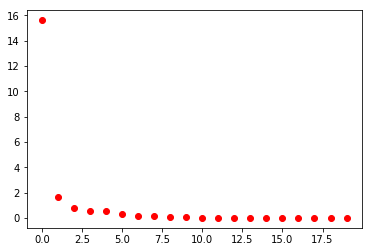

In [30]:
#Principal component analysis:
eig_val, eig_vec = PCA(standardize_tx, 7)
PCA_data = standardize_tx.dot(eig_vec)
print(np.shape(PCA_data))

plt.plot([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19], eig_val, 'ro')

In [31]:
#clean_data_2 = np.delete(standardize_tx, np.s_[2,4,5,7,12,15,19], axis=1)
#clean_data_2 = np.delete(standardize_tx, np.s_[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19], axis=1)

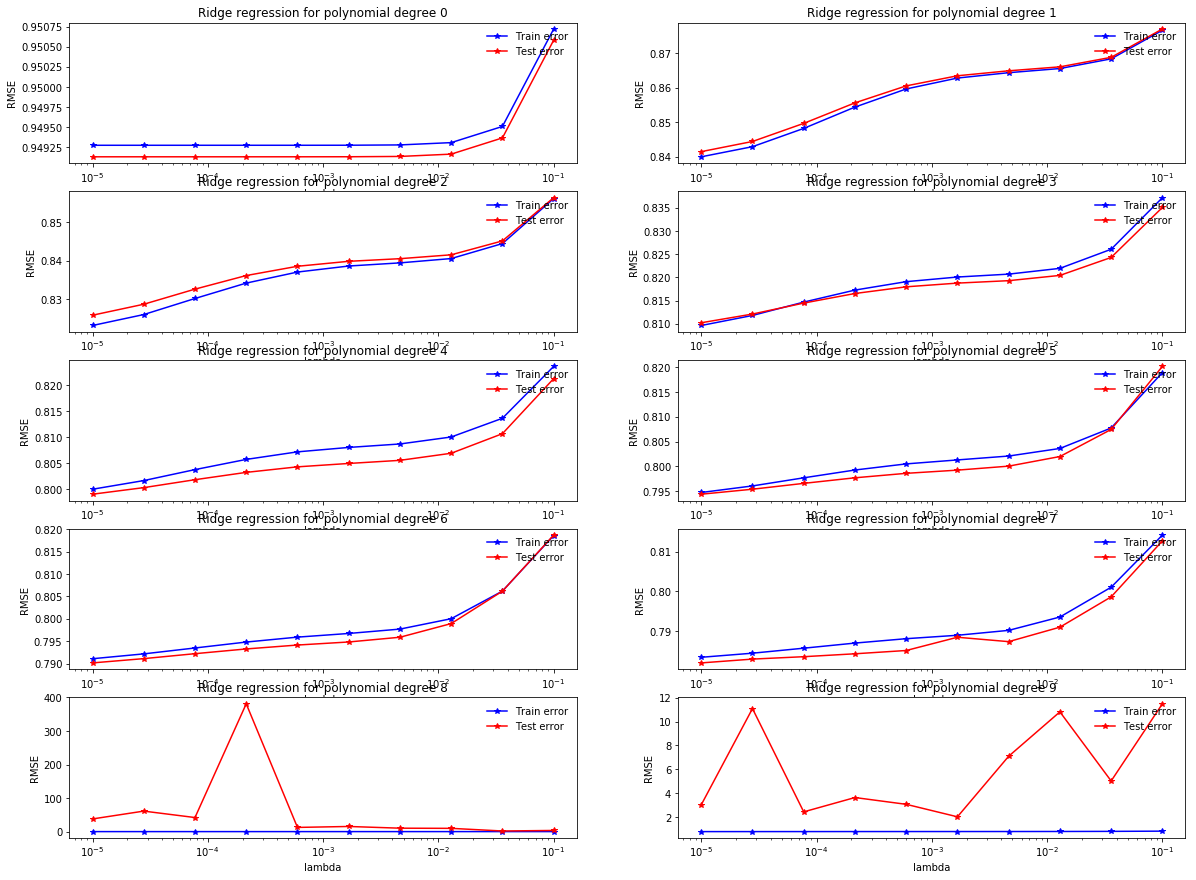

In [39]:
seed = 56
split_ratio = 0.5
plt.figure(figsize=(20,15))

for degree in range(10):
    plt.subplot(5,2,degree+1)
    ridge_regression_demo(standardize_tx,labels,degree, split_ratio, seed)

Submission trials
===

In [20]:
chosen_lambda = 0.001
chosen_degree = 8

data_poly = build_poly(standardize_tx,chosen_degree)
std_data_poly = standardize(data_poly)

weights,loss=ridge_regression(labels,std_data_poly,chosen_lambda)

labels_te,tx_te, indices_te = load_csv_data('test.csv', sub_sample=False)
clean_tx_te = remove_meaningless_data(tx_te, 0.3)
standardize_tx_te = standardize(clean_tx_te)

needed_weights = np.zeros(30)
positions = [0,1,2,3]
for i in range(n_features):
    needed_weights[positions[i]] = weights[i]
print(needed_weights)

y_pred = predict_labels(needed_weights,standardize_tx_te)
create_csv_submission(indices_te, y_pred, 'submission_ridge_1.csv')

[-0.05974807  0.66402959 -0.57298559 -0.05881994  0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.        ]
